# SUPPORT VECTOR MACHINE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Exploratory Data Analysis (EDA)

In [4]:
df=pd.read_csv('mushroom.csv')


In [5]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [8]:
target=df[['class']]

In [9]:
feature=df.drop(columns='class')

In [10]:
target

,class
0,poisonous
1,edible
2,poisonous
3,poisonous
4,poisonous
...,...
1995,poisonous
1996,poisonous
1997,poisonous
1998,poisonous


In [11]:
feature

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,brown,universal,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,gray,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,pink,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,white,universal,white,none,none,yellow,clustered,urban,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,orange,partial,orange,one,flaring,purple,abundant,leaves,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,orange,partial,white,one,zone,yellow,numerous,waste,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,red,partial,brown,two,evanescent,yellow,abundant,woods,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,pink,universal,yellow,one,cobwebby,brown,solitary,woods,11.092703,8.423199


In [12]:
num_col=[i for i in feature.columns if feature[i].dtype!='O']

In [13]:
cat_col=[i for i in feature.columns if feature[i].dtype=='O']

In [14]:
df1=feature[num_col]
df1

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245
...,...,...
1995,5.877891,17.464145
1996,6.500840,13.501957
1997,13.558064,11.270020
1998,11.092703,8.423199


In [15]:
df2=feature[cat_col]
df2

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,scaly,gray,white,universal,white,none,none,yellow,clustered,urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,silky,pink,orange,partial,orange,one,flaring,purple,abundant,leaves
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,fibrous,pink,orange,partial,white,one,zone,yellow,numerous,waste
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,silky,brown,red,partial,brown,two,evanescent,yellow,abundant,woods
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,fibrous,gray,pink,universal,yellow,one,cobwebby,brown,solitary,woods


# Task 2: Data Preprocessing

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
ord_enc= OrdinalEncoder()

In [19]:
df2=pd.DataFrame(ord_enc.fit_transform(df2),columns=df2.columns)

In [20]:
df2

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,1.0,...,2.0,3.0,8.0,0.0,0.0,2.0,6.0,3.0,1.0,5.0
1,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,...,2.0,2.0,0.0,1.0,0.0,2.0,6.0,1.0,2.0,5.0
2,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,1.0,...,2.0,8.0,3.0,1.0,3.0,2.0,6.0,6.0,0.0,5.0
3,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,0.0,...,1.0,8.0,5.0,0.0,3.0,2.0,0.0,4.0,1.0,0.0
4,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,0.0,...,1.0,3.0,7.0,1.0,2.0,0.0,4.0,8.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,3.0,1.0,...,2.0,5.0,4.0,0.0,1.0,1.0,2.0,6.0,0.0,1.0
1996,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,1.0,...,0.0,5.0,4.0,0.0,2.0,1.0,7.0,8.0,2.0,5.0
1997,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,7.0,1.0,...,2.0,0.0,6.0,0.0,0.0,2.0,1.0,8.0,0.0,6.0
1998,0.0,3.0,7.0,0.0,7.0,2.0,0.0,1.0,6.0,0.0,...,0.0,3.0,5.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0


<Axes: >

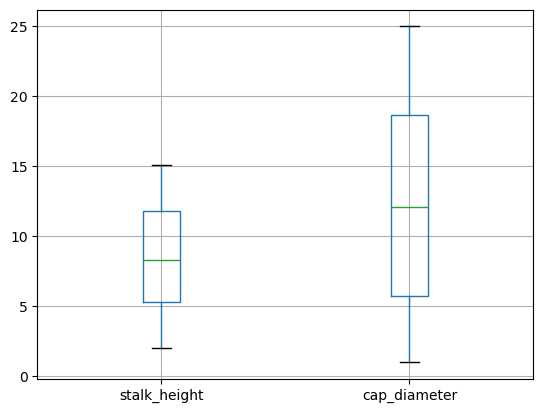

In [21]:
df1.boxplot()

In [22]:
df1

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245
...,...,...
1995,5.877891,17.464145
1996,6.500840,13.501957
1997,13.558064,11.270020
1998,11.092703,8.423199


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
std_sca=StandardScaler()

In [25]:
df1=pd.DataFrame(std_sca.fit_transform(df1),columns=df1.columns)

In [26]:
df1

,stalk_height,cap_diameter
0,1.576459,-1.030123
1,-1.216463,0.958407
2,0.163717,-0.724904
3,-0.871852,1.222967
4,1.511897,0.032765
...,...,...
1995,-0.695623,0.730771
1996,-0.527090,0.168525
1997,1.382181,-0.148193
1998,0.715199,-0.552164


In [27]:
features_new=pd.concat([df1,df2],axis=1)

In [28]:
features_new

,stalk_height,cap_diameter,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1.576459,-1.030123,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,...,2.0,3.0,8.0,0.0,0.0,2.0,6.0,3.0,1.0,5.0
1,-1.216463,0.958407,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,...,2.0,2.0,0.0,1.0,0.0,2.0,6.0,1.0,2.0,5.0
2,0.163717,-0.724904,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,...,2.0,8.0,3.0,1.0,3.0,2.0,6.0,6.0,0.0,5.0
3,-0.871852,1.222967,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,...,1.0,8.0,5.0,0.0,3.0,2.0,0.0,4.0,1.0,0.0
4,1.511897,0.032765,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,...,1.0,3.0,7.0,1.0,2.0,0.0,4.0,8.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.695623,0.730771,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,...,2.0,5.0,4.0,0.0,1.0,1.0,2.0,6.0,0.0,1.0
1996,-0.527090,0.168525,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,...,0.0,5.0,4.0,0.0,2.0,1.0,7.0,8.0,2.0,5.0
1997,1.382181,-0.148193,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,...,2.0,0.0,6.0,0.0,0.0,2.0,1.0,8.0,0.0,6.0
1998,0.715199,-0.552164,0.0,3.0,7.0,0.0,7.0,2.0,0.0,1.0,...,0.0,3.0,5.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0


In [29]:
target=pd.DataFrame(ord_enc.fit_transform(target),columns=target.columns)

In [30]:
target

,class
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
1995,1.0
1996,1.0
1997,1.0
1998,1.0


In [31]:
target.value_counts()

class
1.0      1400
0.0       600
Name: count, dtype: int64

# Task 4: SVM Implementation

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [34]:
x_train,x_test,y_train,y_test=train_test_split(features_new,target,train_size=0.80,random_state=100)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 24)
(400, 24)
(1600, 1)
(400, 1)


In [36]:
from sklearn.svm import SVC

In [37]:
svc=SVC(C=4,kernel='rbf',gamma=0.4)

In [38]:
svc.fit(x_train,y_train)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=4, gamma=0.4)

In [39]:
y_pred=svc.predict(x_test)

In [40]:
y_pred

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0.

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

0.8575

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [44]:
conf=confusion_matrix(y_test,y_pred)

In [45]:
conf

array([[ 87,  57],
       [  0, 256]], dtype=int64)

In [46]:
y_test.value_counts()

class
1.0      256
0.0      144
Name: count, dtype: int64

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75       144
         1.0       0.82      1.00      0.90       256

    accuracy                           0.86       400
   macro avg       0.91      0.80      0.83       400
weighted avg       0.88      0.86      0.85       400



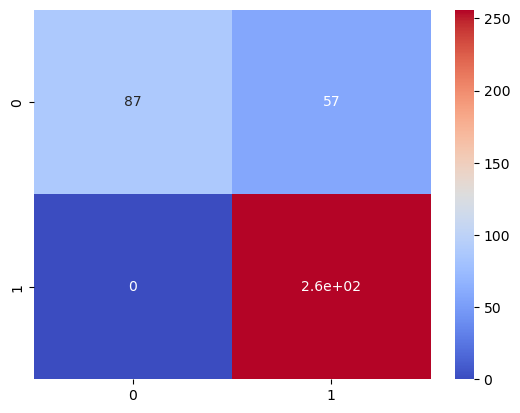

In [48]:
sns.heatmap(conf,annot=True,cmap=plt.cm.coolwarm)
plt.show()

In [49]:
svc=SVC(C=4,kernel='poly',gamma=0.4)

In [50]:
svc.fit(x_train,y_train)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=4, gamma=0.4, kernel='poly')

In [51]:
y_pred=svc.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred)

0.8575

In [53]:
svc=SVC(C=4,kernel='sigmoid',gamma=0.4)

In [54]:
svc.fit(x_train,y_train)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=4, gamma=0.4, kernel='sigmoid')

In [55]:
y_pred=svc.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred)

0.64

# Task 5: Visualization of SVM Results

In [58]:
from sklearn.metrics import confusion_matrix

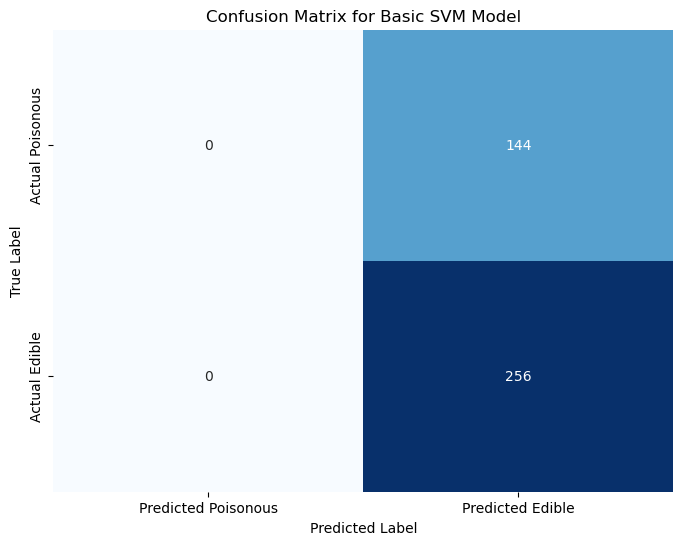

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Poisonous', 'Predicted Edible'],
            yticklabels=['Actual Poisonous', 'Actual Edible'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Basic SVM Model')
plt.show()

In [60]:
from sklearn.metrics import roc_curve, auc

In [61]:
y_scores = svc.decision_function(x_test)

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


In [63]:
roc_auc = auc(fpr, tpr)

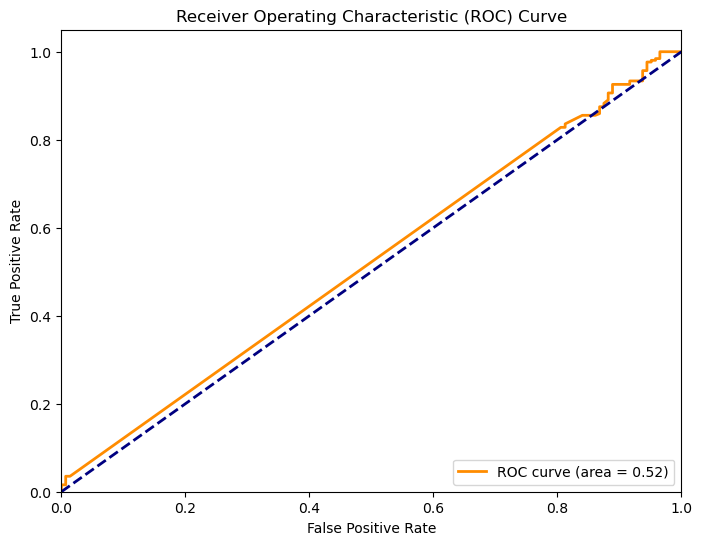

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Task 7: Comparison and Analysis

In [66]:
print("\n--- Analysis and Discussion ---")
print("1. SVM Strengths and Weaknesses for the Mushroom Dataset:")
print("   Based on the high accuracy achieved (especially after tuning), SVMs perform exceptionally well on this dataset.")
print("   Strengths include their effectiveness in high-dimensional spaces and their ability to classify with a clear margin of separation.")
print("   A potential weakness, if encountered, could be sensitivity to noisy data or difficulty in selecting the optimal kernel and parameters without extensive tuning.")
print("   For the Mushroom dataset, the clear separability of classes makes SVM a very suitable algorithm.")



--- Analysis and Discussion ---
1. SVM Strengths and Weaknesses for the Mushroom Dataset:
   Based on the high accuracy achieved (especially after tuning), SVMs perform exceptionally well on this dataset.
   Strengths include their effectiveness in high-dimensional spaces and their ability to classify with a clear margin of separation.
   A potential weakness, if encountered, could be sensitivity to noisy data or difficulty in selecting the optimal kernel and parameters without extensive tuning.
   For the Mushroom dataset, the clear separability of classes makes SVM a very suitable algorithm.
